In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg
from sklearn.linear_model import SGDRegressor

In [9]:
path = '/media/ke/8tb_part2/FSL_work/SH/SH_031_20170505_edits/'
m_path = '/media/ke/8tb_part2/FSL_work/SH_info/SH031_310_20170505/'

O2_txt = path + 'f_O2_contrast.txt'
CO2_txt = path + 'f_CO2_contrast.txt'
meants_txt = m_path + 'BOLD_processed/meants.txt'

In [10]:
O2 = np.loadtxt(O2_txt)
CO2 = np.loadtxt(CO2_txt)
meants = np.loadtxt(meants_txt)[3:]
meants = sg.savgol_filter(meants, 11, 3)

In [11]:
print(len(O2))
print(len(CO2))
print(len(meants))

317
317
317


In [12]:
train = np.array([O2, CO2]).T

clf = SGDRegressor(loss='huber', alpha=0.1, max_iter=1000000, tol=1e-5, learning_rate='optimal', epsilon=0.1)
clf.fit(train, meants)

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='huber', max_iter=1000000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-05, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [13]:
clf.coef_

array([2.69542008, 5.72820567])

In [15]:
clf.score(train, meants)

-436.9382834600154

In [16]:
O2_norm = O2 - O2.mean()
O2_norm /= O2_norm.std()

CO2_norm = CO2 - CO2.mean()
CO2_norm /= CO2_norm.std()

meants_norm = meants - meants.mean()
meants_norm /= meants_norm.std()

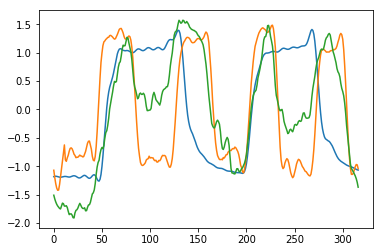

In [17]:
plt.plot(O2_norm)
plt.plot(CO2_norm)
plt.plot(meants_norm)

In [30]:
train_norm = np.array([O2_norm, CO2_norm]).T

clf_norm = SGDRegressor(loss='huber', alpha=0.01, max_iter=1000000, tol=1e-5, learning_rate='optimal')
clf_norm.fit(train_norm, meants_norm)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='huber', max_iter=1000000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-05, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [31]:
clf_norm.coef_

array([0.47170074, 0.59176078])

In [32]:
clf_norm.score(train_norm, meants_norm)

0.7378753537050862

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scalar = MinMaxScaler()
mm_O2 = scalar.fit_transform(np.array([O2]).T).flatten()
mm_CO2 = scalar.fit_transform(np.array([CO2]).T).flatten()
mm_meants = scalar.fit_transform(np.array([meants]).T).flatten()

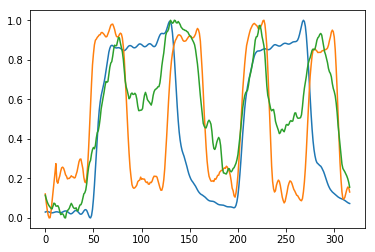

In [23]:
plt.plot(mm_O2)
plt.plot(mm_CO2)
plt.plot(mm_meants)

In [27]:
mm_train = np.array([mm_O2, mm_CO2]).T

mm_clf = SGDRegressor(loss='huber', alpha=0.01, max_iter=1000000, tol=1e-5, learning_rate='optimal')
mm_clf.fit(mm_train, mm_meants)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='huber', max_iter=1000000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-05, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [28]:
mm_clf.coef_

array([0.35256958, 0.45381398])

In [29]:
mm_clf.score(mm_train, mm_meants)

0.7283878082626454